In [1]:
import pandas as pd

In [4]:
df=pd.read_csv('mobile_train.csv')
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [5]:
X=df.drop(labels='price_range',axis=1)
Y=df[['price_range']]

In [6]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [7]:
X=pd.DataFrame(StandardScaler().fit_transform(X))

In [8]:
X.index=range(X.shape[0])
Y.index=range(Y.shape[0])

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2)

# for multiclass classification apply to_categorical it will work as one hot encoding

In [11]:
from keras.utils import to_categorical

In [12]:
ytrain_cat=to_categorical(ytrain)
ytest_cat=to_categorical(ytest)

In [14]:
ytrain_cat[:5]

array([[1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]])

In [15]:
ytest_cat[:5]

array([[0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]])

# building networks

In [23]:
from keras.models import Sequential
from keras.layers import Dense,Input,Dropout
from keras.callbacks import EarlyStopping

# earlystopping

# it is use to prevent overfitting
# if the score or error drops continues till the number of callbacks given then it will stop the epochs to prevent overfitting

In [27]:
#intialize the nerual network
model=Sequential()

#add input layer
model.add(Input(shape=(xtrain.shape[1],)))

#add hidden layer1
model.add(Dense(units=64, activation='relu'))
#add droput
model.add(Dropout(rate=0.4))

#add hidden layer 2
model.add(Dense(units=32, activation='relu'))

#output layer
model.add(Dense(units=ytrain_cat.shape[1],activation='softmax'))

In [28]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [29]:
es=EarlyStopping(monitor='val_loss',patience=10)# if after 10 value drop its stop =patience

In [30]:
hist=model.fit(xtrain,ytrain_cat,validation_split=0.2,epochs=50,callbacks=[es])

Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.2701 - loss: 1.5164 - val_accuracy: 0.3531 - val_loss: 1.3018
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3407 - loss: 1.3180 - val_accuracy: 0.4688 - val_loss: 1.1865
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4826 - loss: 1.1600 - val_accuracy: 0.5094 - val_loss: 1.0575
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5426 - loss: 1.0161 - val_accuracy: 0.6031 - val_loss: 0.9059
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6100 - loss: 0.8969 - val_accuracy: 0.6656 - val_loss: 0.7869
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6397 - loss: 0.8015 - val_accuracy: 0.7344 - val_loss: 0.6906
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6625 - loss: 0.7311 - val_accuracy: 0.7750 - val_loss: 0.6116
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7256 - loss: 0.6285 - val_accuracy: 0.8344 - val_loss:

In [31]:
import matplotlib.pyplot as plt

AttributeError: module 'matplotlib.pyplot' has no attribute 'labels'

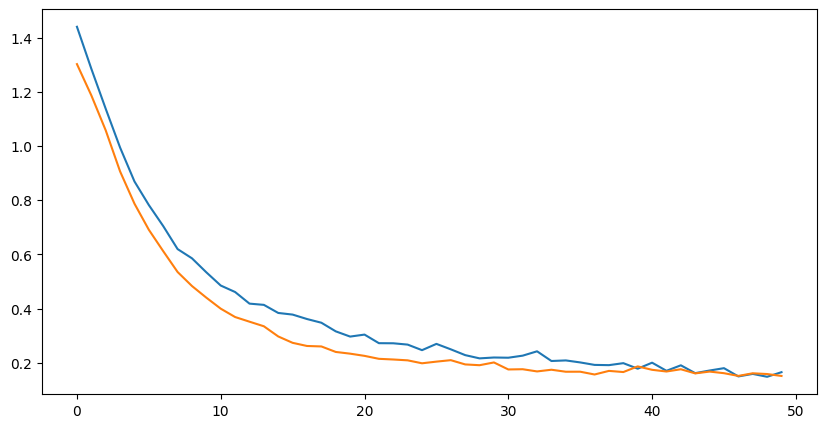

In [34]:
plt.figure(figsize=(10,5))
plt.plot(hist.history['loss'],label='Trainingloss')
plt.plot(hist.history['val_loss'],label='Validationloss')
plt.labels('epoch')
plt.labels('categorical_crossentropy')
plt.legend()
plt.show()

# evaluate model

In [35]:
model.evaluate(xtrain,ytrain_cat)

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9932 - loss: 0.0621


[0.08281663060188293, 0.9806249737739563]

In [36]:
model.evaluate(xtest,ytest_cat)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9362 - loss: 0.1671  


[0.16208869218826294, 0.9399999976158142]